Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)


Loading both the datasets

In [4]:
da_df = pd.read_csv("australian_data_analyst_jobs.csv")
ds_df = pd.read_csv("australian_data_scientist_jobs.csv")
print(da_df.shape)
print(ds_df.shape)



(500, 8)
(168, 8)


Adding role labels

In [5]:
da_df["role"] = "Data Analyst"
ds_df["role"] = "Data Scientist"


Standardize column names

In [6]:
da_df.columns = da_df.columns.str.lower().str.replace(" ", "_")
ds_df.columns = ds_df.columns.str.lower().str.replace(" ", "_")


Merge Datasets

In [7]:
jobs_df = pd.concat([da_df, ds_df], ignore_index=True)
jobs_df.head()


,company_name,job_title,job_description,job_location/city,job_location/country,job_salary/estimated,job_salary/pay_period,job_posted_date,role
0,Wesley Mission Queensland,Data And Insights Analyst,Reference Number 15304\nPosition Title Data an...,Australia,australia,False,hourly,2024-01-28T00:00:00,Data Analyst
1,Ford Motor Company,Marketing Communications Analyst,"About Us\n\nFord is a family company, one that...",Richmond,australia,True,hourly,2024-02-14T00:00:00,Data Analyst
2,Catholic Education Diocese Of Parramatta,Data Analyst,THANK YOU FOR YOUR INTEREST IN APPLYING FOR A ...,Parramatta,australia,True,hourly,2024-01-23T00:00:00,Data Analyst
3,Northern Health,Data Analyst,About Northern Health:\n\n\n\n\nAs an organisa...,Australia,australia,False,hourly,2024-02-06T00:00:00,Data Analyst
4,The Smith Family (Australia),Policy Analyst,* Become part of our family and make a differe...,Australia,australia,False,hourly,2024-02-15T00:00:00,Data Analyst


Data Cleaning

In [10]:
# Standardizing the column names
jobs_df.columns = (
    jobs_df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

# Identifying location column dynamically
location_candidates = [c for c in jobs_df.columns if "loc" in c or "city" in c]

# Picking the first valid location column
location_col = location_candidates[0] if location_candidates else None
print("Using location column:", location_col)

# Defining required columns
required_columns = ["job_title", "job_description"]

if location_col:
    required_columns.append(location_col)

# Droping rows with missing critical values
jobs_df = jobs_df.dropna(subset=required_columns)

# Removing duplicate rows
jobs_df = jobs_df.drop_duplicates()

# Reseting index
jobs_df.reset_index(drop=True, inplace=True)
jobs_df.info()
jobs_df.head()



Using location column: job_location/city
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company_name           565 non-null    object
 1   job_title              599 non-null    object
 2   job_description        599 non-null    object
 3   job_location/city      599 non-null    object
 4   job_location/country   599 non-null    object
 5   job_salary/estimated   599 non-null    bool  
 6   job_salary/pay_period  599 non-null    object
 7   job_posted_date        599 non-null    object
 8   role                   599 non-null    object
dtypes: bool(1), object(8)
memory usage: 38.2+ KB


,company_name,job_title,job_description,job_location/city,job_location/country,job_salary/estimated,job_salary/pay_period,job_posted_date,role
0,Wesley Mission Queensland,Data And Insights Analyst,Reference Number 15304\nPosition Title Data an...,Australia,australia,False,hourly,2024-01-28T00:00:00,Data Analyst
1,Ford Motor Company,Marketing Communications Analyst,"About Us\n\nFord is a family company, one that...",Richmond,australia,True,hourly,2024-02-14T00:00:00,Data Analyst
2,Catholic Education Diocese Of Parramatta,Data Analyst,THANK YOU FOR YOUR INTEREST IN APPLYING FOR A ...,Parramatta,australia,True,hourly,2024-01-23T00:00:00,Data Analyst
3,Northern Health,Data Analyst,About Northern Health:\n\n\n\n\nAs an organisa...,Australia,australia,False,hourly,2024-02-06T00:00:00,Data Analyst
4,The Smith Family (Australia),Policy Analyst,* Become part of our family and make a differe...,Australia,australia,False,hourly,2024-02-15T00:00:00,Data Analyst


Exploratory Data Analysis(EDA)

In [13]:
# Re-detecting location column safely
location_col = [c for c in jobs_df.columns if "loc" in c or "city" in c][0]
print("Grouping by location column:", location_col)

# Job count by location
location_demand = (
    jobs_df
    .groupby(location_col)["role"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)

location_demand


Grouping by location column: job_location/city


,role
job_location/city,
Sydney,134
Australia,84
Melbourne,70
sydney,62
Brisbane,31
melbourne,26
australia,21
brisbane,13
Canberra,11


Visualization

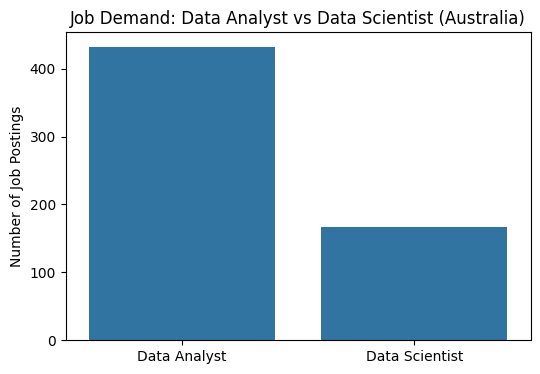

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=jobs_df, x="role")
plt.title("Job Demand: Data Analyst vs Data Scientist (Australia)")
plt.xlabel("")
plt.ylabel("Number of Job Postings")
plt.show()


Skill Extraction

In [15]:
skills = [
    "python", "sql", "excel", "tableau", "power bi",
    "machine learning", "deep learning", "aws", "azure", "statistics"
]
def extract_skill_counts(df, skills):
    skill_counts = {}
    descriptions = df["job_description"].str.lower()

    for skill in skills:
        skill_counts[skill] = descriptions.str.contains(skill).sum()

    return pd.DataFrame.from_dict(skill_counts, orient="index", columns=["count"]).sort_values(by="count", ascending=False)
da_skills = extract_skill_counts(jobs_df[jobs_df["role"] == "Data Analyst"], skills)
ds_skills = extract_skill_counts(jobs_df[jobs_df["role"] == "Data Scientist"], skills)
da_skills.head()
ds_skills.head()


,count
python,110
machine learning,99
sql,79
excel,75
statistics,65


Skill Comparison visualization

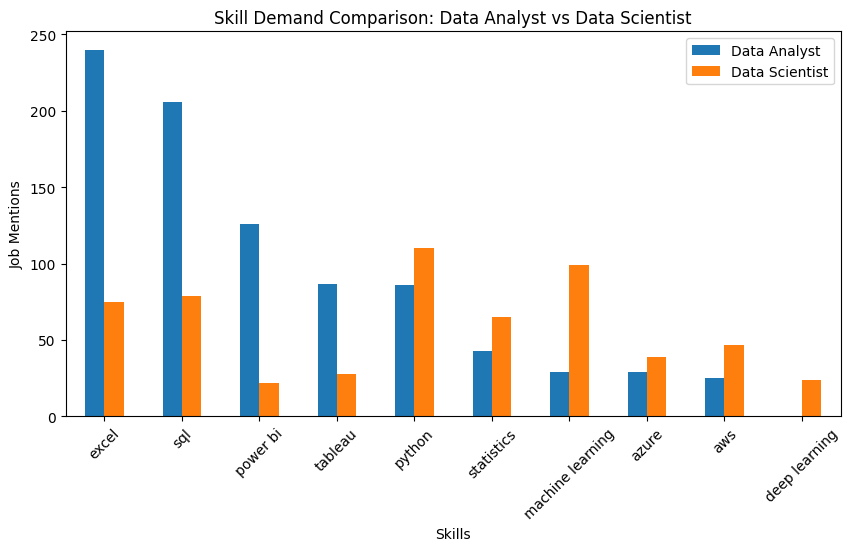

In [16]:
skill_compare = pd.concat(
    [
        da_skills.rename(columns={"count": "Data Analyst"}),
        ds_skills.rename(columns={"count": "Data Scientist"})
    ],
    axis=1
).fillna(0)

skill_compare.plot(kind="bar", figsize=(10,5))
plt.title("Skill Demand Comparison: Data Analyst vs Data Scientist")
plt.ylabel("Job Mentions")
plt.xlabel("Skills")
plt.xticks(rotation=45)
plt.show()


Word Frequency analysis

In [17]:
from collections import Counter

words = " ".join(jobs_df["job_description"].str.lower()).split()
common_words = Counter(words).most_common(20)
common_words


[('and', 19020),
 ('to', 11075),
 ('*', 10107),
 ('the', 9351),
 ('of', 6814),
 ('a', 6172),
 ('in', 5439),
 ('data', 5028),
 ('with', 4315),
 ('for', 3808),
 ('our', 3016),
 ('we', 2737),
 ('you', 2715),
 ('is', 2210),
 ('experience', 2073),
 ('business', 1966),
 ('as', 1856),
 ('will', 1843),
 ('or', 1771),
 ('are', 1754)]